In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [32]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [33]:
init_notebook_mode(connected=True)
cf.go_offline()

In [34]:
df=pd.read_csv('MURITEOFPOTASH.csv')

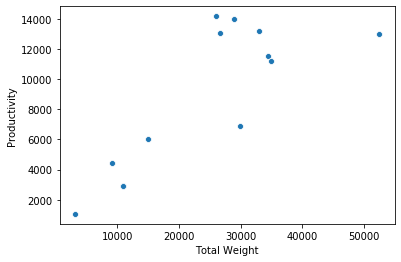

In [35]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [36]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.0,13.000000,13.000000
mean,1225.615385,191803.538462,50.077692,56.684615,24296.246154,0.243077,0.024308,0.0,5.703077,0.0,8805.270000,51796.030769
std,242.862972,695.686306,38.791033,43.900981,13736.076874,0.138467,0.013847,0.0,14.744733,0.0,4857.014152,11377.231966
min,791.000000,191060.000000,0.000000,0.000000,3147.200000,0.030000,0.003000,0.0,0.000000,0.0,1057.140000,39072.500000
25%,1184.000000,191172.000000,0.000000,0.000000,11000.000000,0.110000,0.011000,0.0,0.000000,0.0,4457.140000,39202.200000
50%,1323.000000,191485.000000,59.420000,61.250000,26700.000000,0.270000,0.027000,0.0,0.000000,0.0,11200.320000,54314.000000
75%,1339.000000,192177.000000,75.000000,94.450000,33000.000000,0.330000,0.033000,0.0,0.000000,0.0,13064.220000,56561.000000
max,1560.000000,193029.000000,103.800000,111.300000,52500.000000,0.530000,0.053000,0.0,50.570000,0.0,14176.450000,75965.000000


In [37]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

In [38]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(lm.intercept_)

3221.0906269520046


In [40]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.239324


In [41]:
predictions = lm.predict(X_test)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 2710.2533761422337
MSE: 8122723.697669266
RMSE: 2850.03924493493
r2_score: 0.6994142563565229


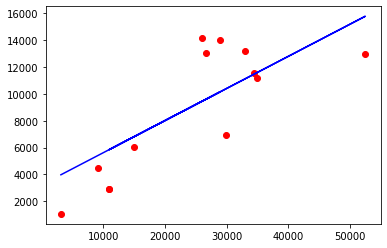

In [43]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [44]:
joblib.dump(lm,"Murite_Of_Potash.pkl")#only execute if rmse is less than half of mean of productivity

['Murite_Of_Potash.pkl']